In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
concrete_df=pd.read_excel("C:/Users/Sarath/Desktop/Datascience/Machine Learning/ML_Projrct_Concrete_Strength_Prediction/Concrete_Data.xls")

In [3]:
concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
concrete_df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cement","Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast_furnace_slag","Fly Ash (component 3)(kg in a m^3 mixture)":"Fly_Ash","Water  (component 4)(kg in a m^3 mixture)":"Water","Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplasticizer","Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse_Aggregate","Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Aggregate",'Concrete compressive strength(MPa, megapascals) ':"Concrete_Strength"},inplace=True)

In [5]:
concrete_df.head()

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
# Checking for data types
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_furnace_slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age (day)           1030 non-null   int64  
 8   Concrete_Strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


All features are numeric.

In [7]:
concrete_df.isnull().sum()

Cement                0
Blast_furnace_slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age (day)             0
Concrete_Strength     0
dtype: int64

There are no null values present 

In [8]:
concrete_df.describe()

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


There are zeros present in Blastfurnace , flyash and superplasticizer 
Imputing zeros with median


### Detecting Outliers 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cement'>

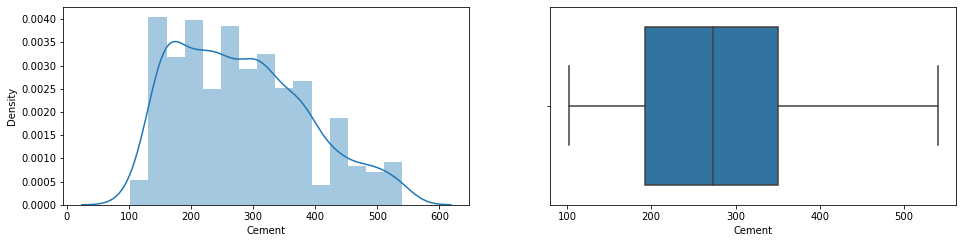

In [9]:
#cement column
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df['Cement'])
plt.subplot(2,2,2)
sns.boxplot(concrete_df['Cement'])

no outliers in cement columns 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blast_furnace_slag'>

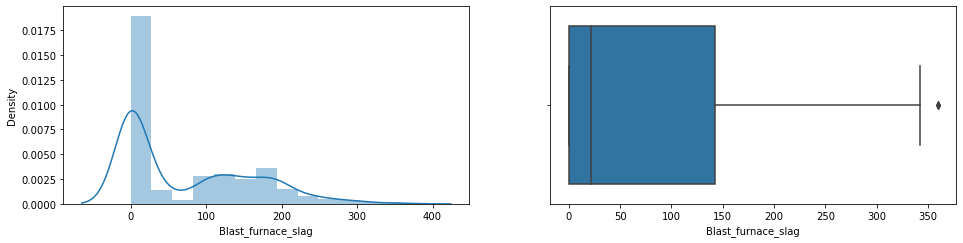

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df['Blast_furnace_slag'])
plt.subplot(2,2,2)
sns.boxplot(concrete_df['Blast_furnace_slag'])

In [11]:
#Removing outliers 
iqr = 1.5 * (np.percentile(concrete_df["Blast_furnace_slag"], 75) - np.percentile(concrete_df["Blast_furnace_slag"], 25)) 
concrete_df.drop(concrete_df[concrete_df['Blast_furnace_slag'] > (iqr + np.percentile(concrete_df["Blast_furnace_slag"], 75))].index, inplace=True) 
concrete_df.drop(concrete_df[concrete_df['Blast_furnace_slag'] < (np.percentile(concrete_df['Blast_furnace_slag'], 25) - iqr)].index, inplace=True)



C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blast_furnace_slag'>

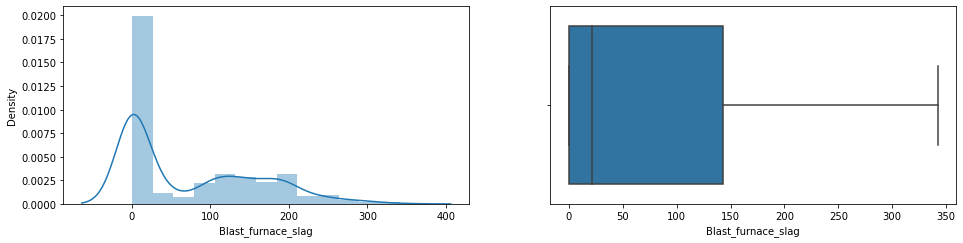

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df['Blast_furnace_slag'])
plt.subplot(2,2,2)
sns.boxplot(concrete_df['Blast_furnace_slag'])

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fly_Ash'>

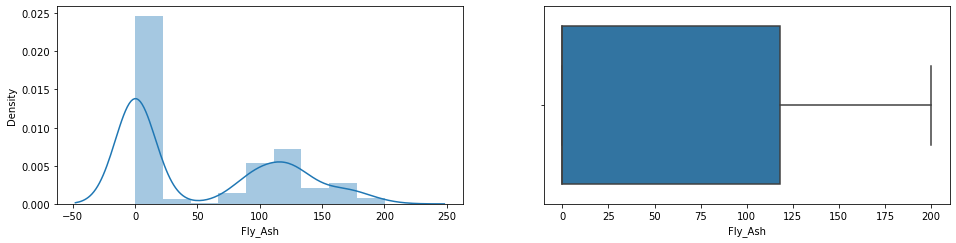

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Fly_Ash"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Fly_Ash"])

No outliers present in Fly_Ash column 


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Water'>

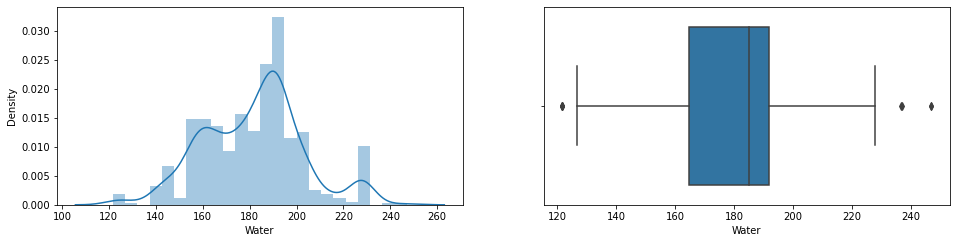

In [14]:
# water column
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df['Water'])
plt.subplot(2,2,2)
sns.boxplot(concrete_df['Water'])

In [15]:
iqr = 1.5 * (np.percentile(concrete_df["Water"], 75) - np.percentile(concrete_df["Water"], 25)) 
concrete_df.drop(concrete_df[concrete_df['Water'] > (iqr + np.percentile(concrete_df["Water"], 75))].index, inplace=True) 
concrete_df.drop(concrete_df[concrete_df['Water'] < (np.percentile(concrete_df['Water'], 25) - iqr)].index, inplace=True)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Water'>

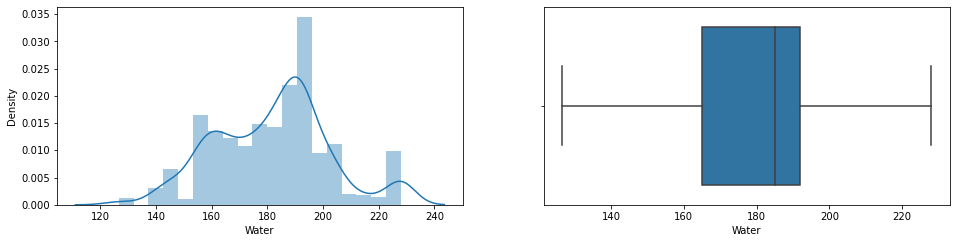

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df['Water'])
plt.subplot(2,2,2)
sns.boxplot(concrete_df['Water'])

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Superplasticizer'>

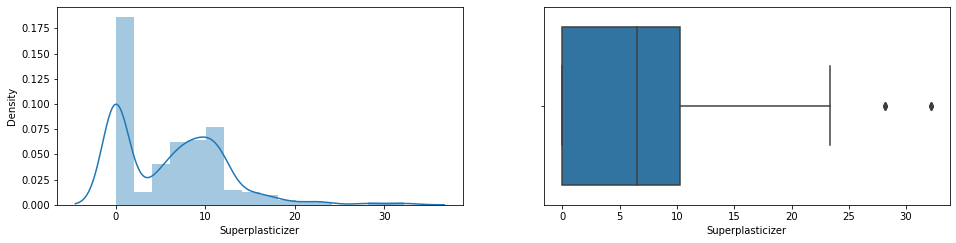

In [17]:
# Superplasticizer
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Superplasticizer"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Superplasticizer"])

In [18]:
iqr = 1.5 * (np.percentile(concrete_df["Superplasticizer"], 75) - np.percentile(concrete_df["Superplasticizer"], 25)) 
concrete_df.drop(concrete_df[concrete_df["Superplasticizer"] > (iqr + np.percentile(concrete_df["Superplasticizer"], 75))].index, inplace=True) 
concrete_df.drop(concrete_df[concrete_df["Superplasticizer"] < (np.percentile(concrete_df["Superplasticizer"], 25) - iqr)].index, inplace=True)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Superplasticizer'>

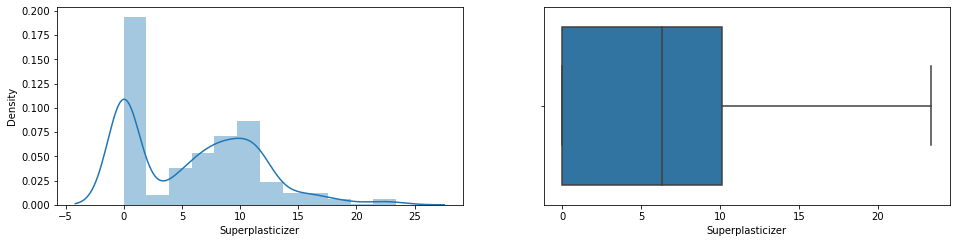

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Superplasticizer"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Superplasticizer"])

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Coarse_Aggregate'>

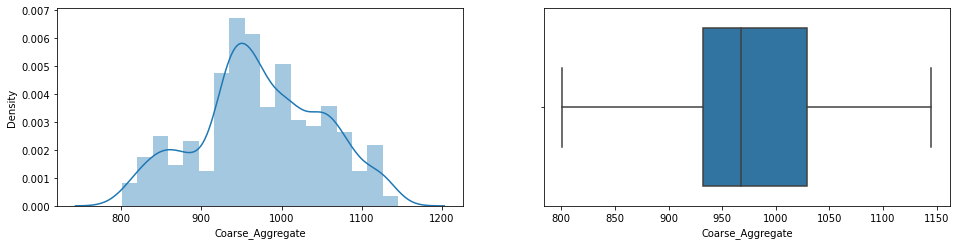

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Coarse_Aggregate"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Coarse_Aggregate"])

There is no outliers in Coarse_Aggregate columns

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fine_Aggregate'>

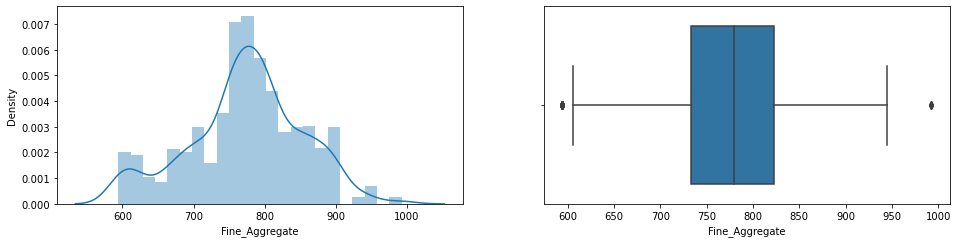

In [21]:
# Fine_Aggregate
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Fine_Aggregate"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Fine_Aggregate"])

In [22]:
fine_1 = concrete_df['Fine_Aggregate'].quantile(0.95)
concrete_df= concrete_df[concrete_df['Fine_Aggregate']< fine_1]

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fine_Aggregate'>

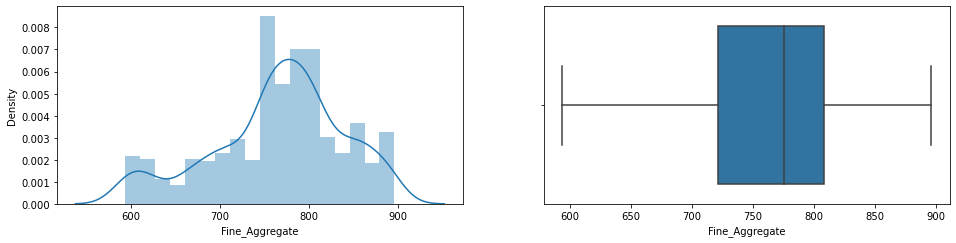

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Fine_Aggregate"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Fine_Aggregate"])

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age (day)'>

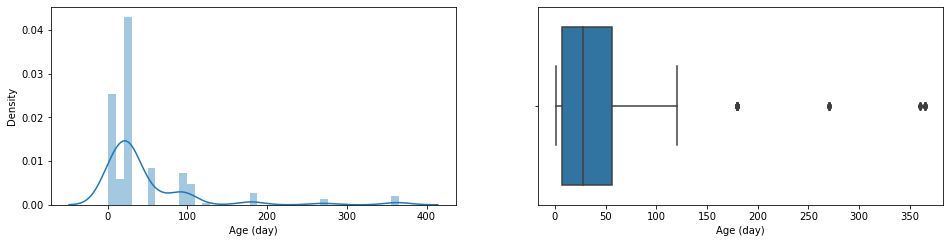

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Age (day)"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Age (day)"])

In [25]:
age= concrete_df[ concrete_df['Age (day)'] > 80].index


In [26]:
concrete_df.drop(age,inplace=True)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age (day)'>

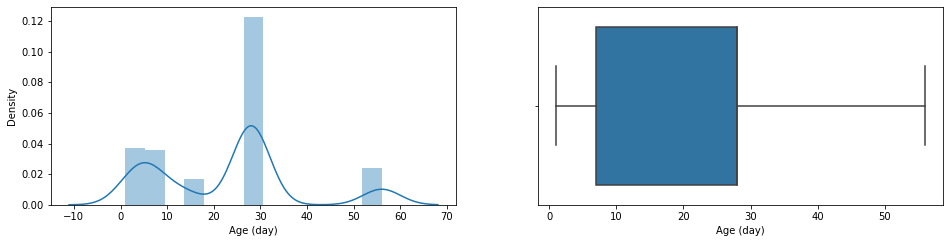

In [27]:
# Age
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Age (day)"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Age (day)"])

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Concrete_Strength'>

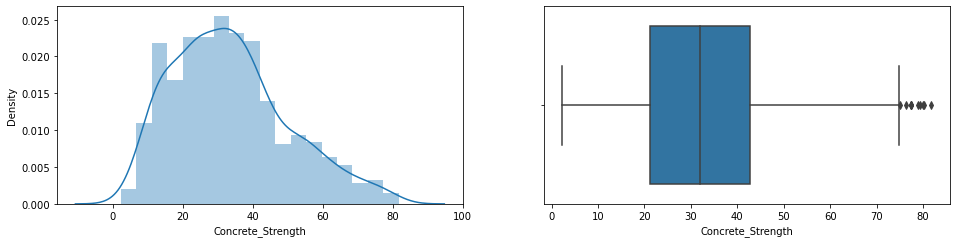

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Concrete_Strength"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Concrete_Strength"])

In [29]:
ind_names = concrete_df[ concrete_df['Concrete_Strength'] > 70].index

In [30]:
concrete_df.drop(ind_names,inplace=True)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Concrete_Strength'>

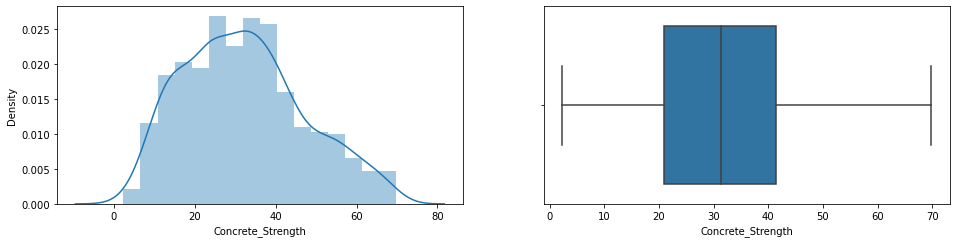

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(concrete_df["Concrete_Strength"])
plt.subplot(2,2,2)
sns.boxplot(concrete_df["Concrete_Strength"])

In [32]:
concrete_df.shape

(757, 9)

## Bivariate Analysis

<AxesSubplot:>

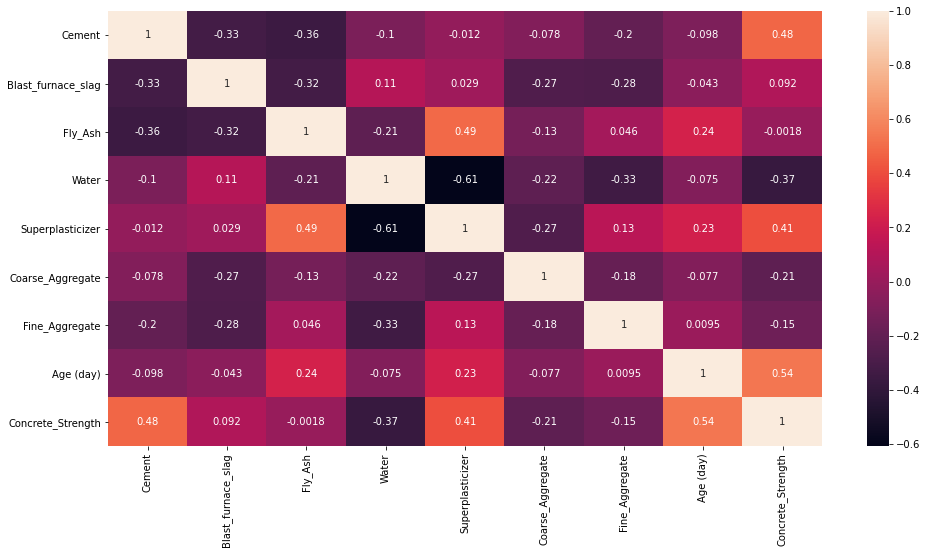

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(concrete_df.corr(),annot=True)

There is no corelation between the independend variables 


Text(0.5, 1.0, 'Cement & Concrete_Strength')

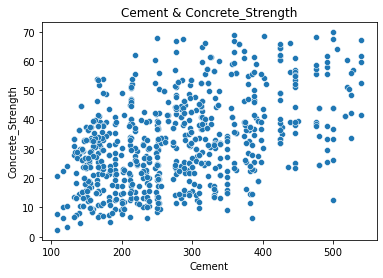

In [34]:
sns.scatterplot(x = 'Cement', y = 'Concrete_Strength', data = concrete_df )
plt.title('Cement & Concrete_Strength')


We can find positive corelation between cement and concrete_stregth

Text(0.5, 1.0, 'Blast_furnace_slag & Concrete_Strength')

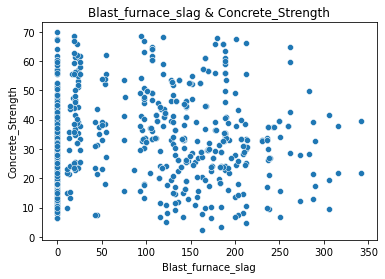

In [35]:
sns.scatterplot(x = 'Blast_furnace_slag', y = 'Concrete_Strength', data = concrete_df )
plt.title('Blast_furnace_slag & Concrete_Strength')

we cannot find any corelation between last furnace slag and concrete_strength 

Text(0.5, 1.0, 'Fly_Ash & Concrete_Strength')

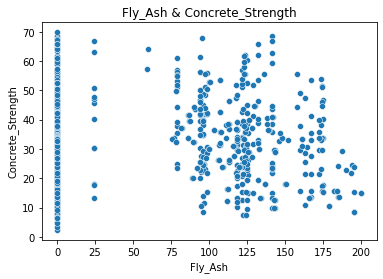

In [36]:
sns.scatterplot(x = 'Fly_Ash', y = 'Concrete_Strength', data = concrete_df )
plt.title('Fly_Ash & Concrete_Strength')

we cannot find any corelation between fly ash and concrete strength

Text(0.5, 1.0, 'Superplasticizer & Concrete_Strength')

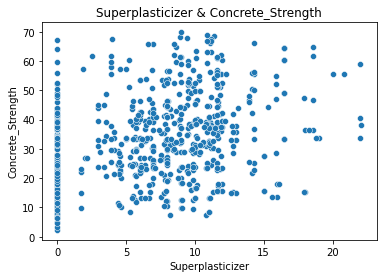

In [37]:
sns.scatterplot(x = 'Superplasticizer', y = 'Concrete_Strength', data = concrete_df )
plt.title('Superplasticizer & Concrete_Strength')

we can find a small positive corelation between  superplasticizer and concrete_strength

Text(0.5, 1.0, 'Coarse_Aggregate & Concrete_Strength')

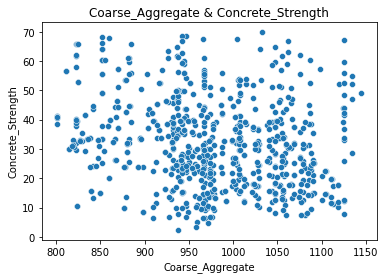

In [38]:
sns.scatterplot(x = 'Coarse_Aggregate', y = 'Concrete_Strength', data = concrete_df )
plt.title('Coarse_Aggregate & Concrete_Strength')

There is no correlation between coarse_aggregate and concrete_strength

Text(0.5, 1.0, 'Fine_Aggregate & Concrete_Strength')

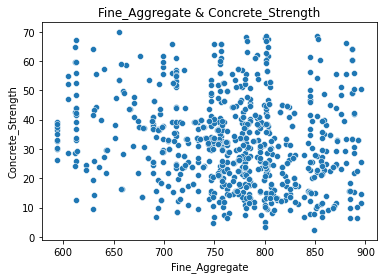

In [39]:
sns.scatterplot(x = 'Fine_Aggregate', y = 'Concrete_Strength', data = concrete_df )
plt.title('Fine_Aggregate & Concrete_Strength')

No corelation between fine_Aggregate and concrete_strength

In [40]:
concrete_df["Age (day)"]=concrete_df["Age (day)"].astype(int)

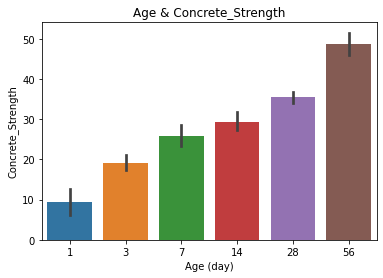

In [41]:
sns.barplot(x = 'Age (day)', y = 'Concrete_Strength', data = concrete_df )
plt.title('Age & Concrete_Strength')
plt.show()

The above bargraph shows that age 91 has the maximum concrete_strength and then decreases 

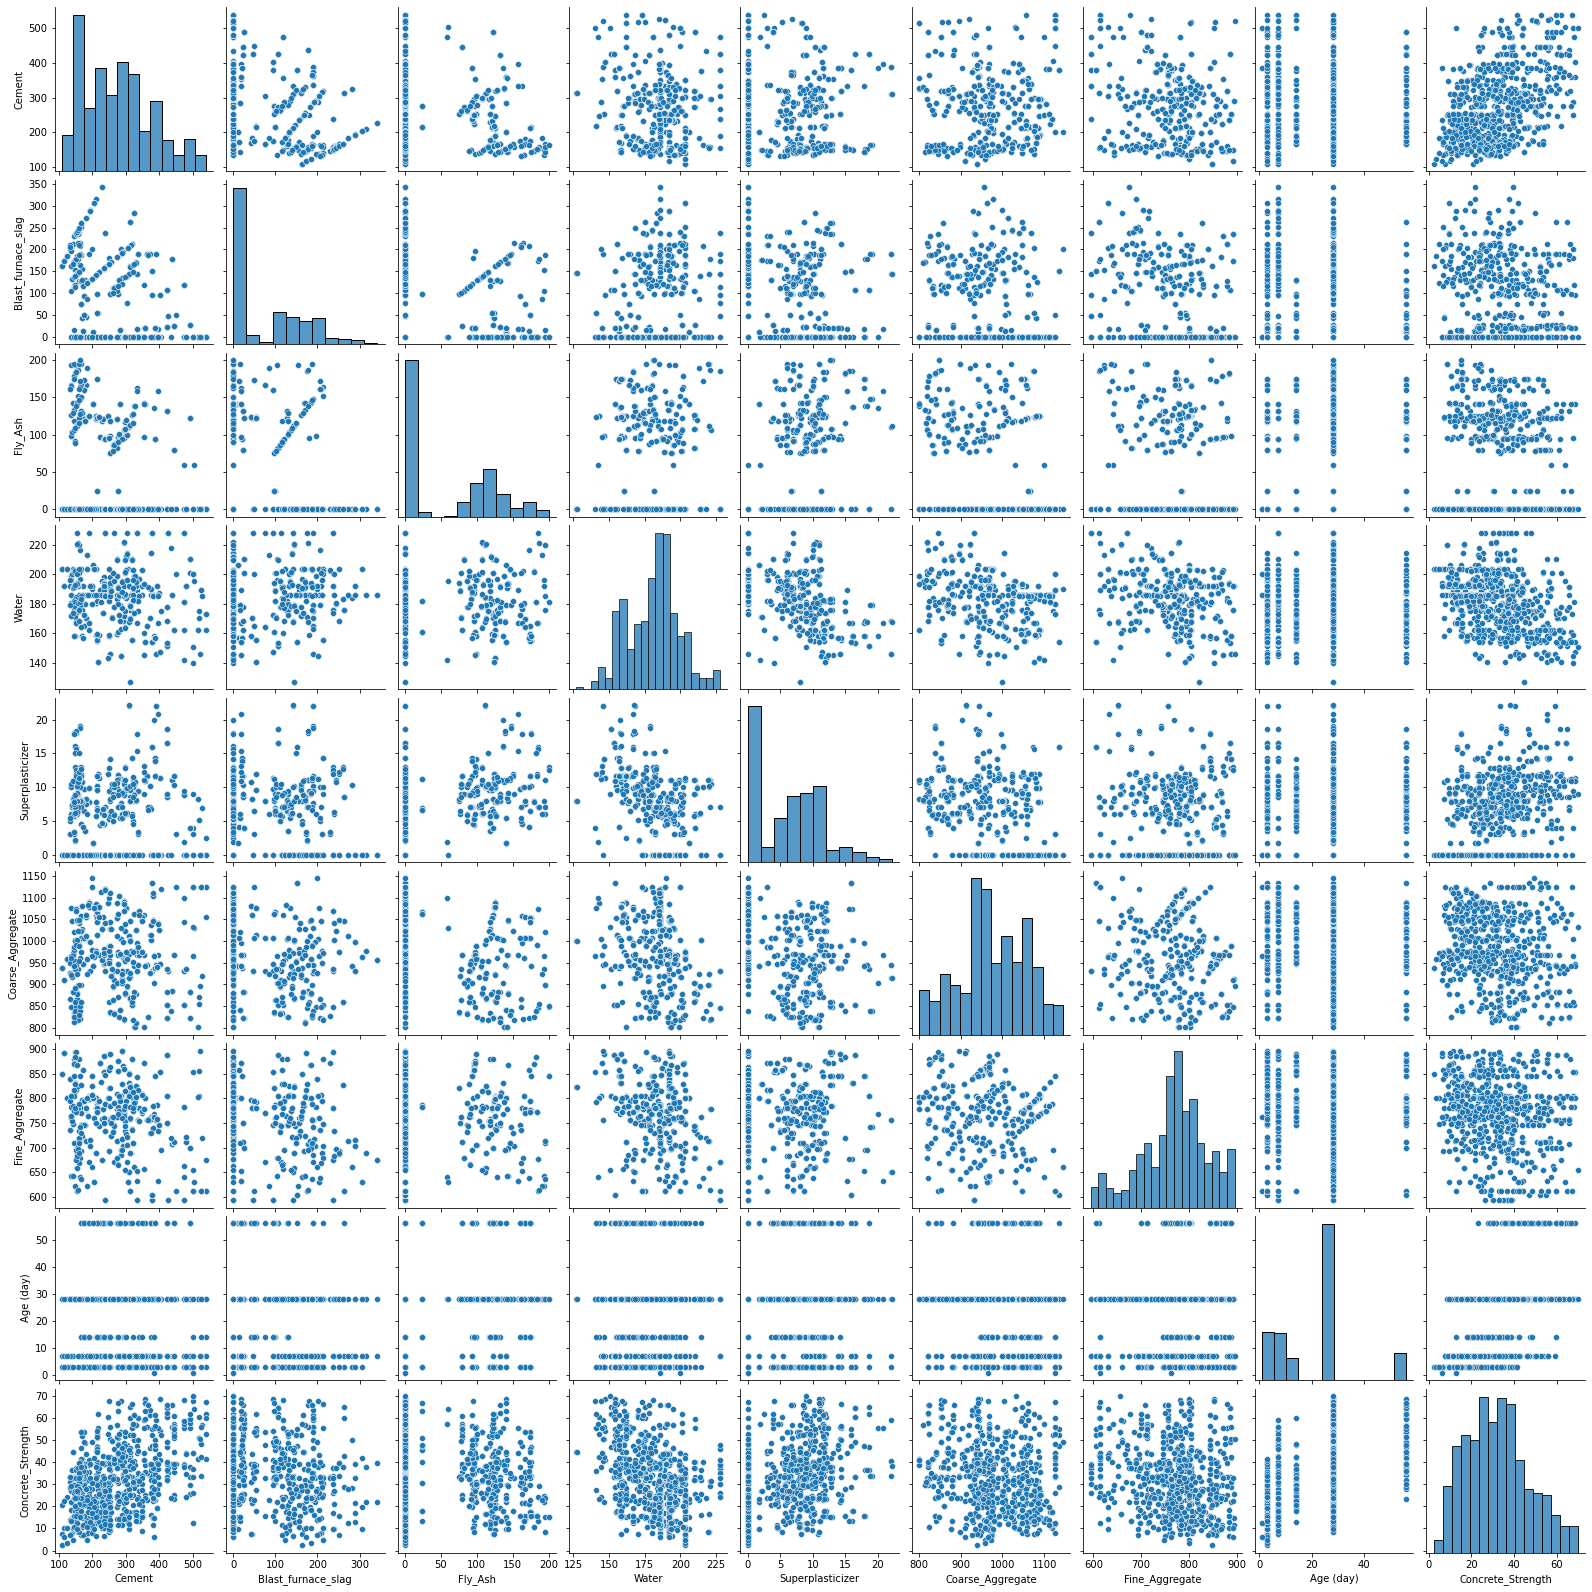

In [42]:
sns.pairplot(concrete_df)
plt.show()

cement has positive correlation with  Blast_furnace_slag and concrete_strength


### RFE  for selecting significant features 

In [43]:
Y= concrete_df.Concrete_Strength
X=concrete_df.drop("Concrete_Strength",axis=1)

In [44]:
X

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [45]:
from sklearn.feature_selection import RFE

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rfe=RFE(model,n_features_to_select=8)
rfe_fit= rfe.fit(X,Y)


In [47]:
print("num of Features", rfe_fit.n_features_)
print("selected Features", rfe_fit.support_)
print("feature Rank",rfe_fit.ranking_)

num of Features 8
selected Features [ True  True  True  True  True  True  True  True]
feature Rank [1 1 1 1 1 1 1 1]


From RFE we cannot find any multicolinearity between fly_ash,Coarse_aagregate,Fine_aggregate so removing the features 

In [48]:
#new_df.drop(["Fly_Ash","Coarse_Aggregate","Fine_Aggregate"],axis=1,inplace=True)

In [49]:
concrete_df

,Cement,Blast_furnace_slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age (day),Concrete_Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Splitting The Data 

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=24)

In [51]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(529, 8)
(529,)
(228, 8)
(228,)


### Scalling the data 

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Linear Regression Model

### Training

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [56]:
print(X_train.shape)
print(Y_train.shape)

(529, 8)
(529,)


In [57]:
print(X_test.shape)
print(Y_test.shape)

(228, 8)
(228,)


In [58]:
Y_pred_LR = reg.predict(X_train)


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


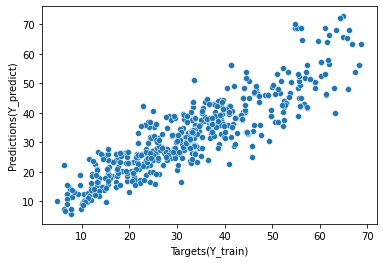

In [59]:
sns.scatterplot(Y_train,Y_pred_LR)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


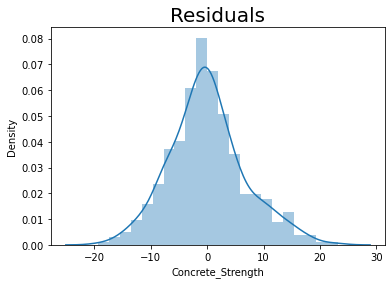

In [60]:
sns.distplot(Y_train - Y_pred_LR)
plt.title('Residuals', size=20)
plt.show()

### Testing 

In [61]:
Y_pred_LRt=reg.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


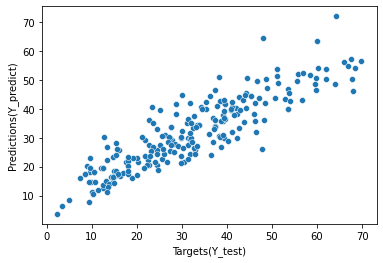

In [62]:
sns.scatterplot(Y_test,Y_pred_LRt)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


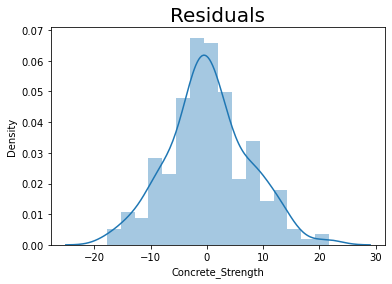

In [63]:
sns.distplot(Y_test - Y_pred_LRt)
plt.title('Residuals', size=20)
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [65]:
mse=mean_squared_error(Y_test,Y_pred_LRt)
print("mse:",mse)
rmse=np.sqrt(mse)
print("rmse:", rmse)
print ("R2 Score :" , r2_score(Y_test,Y_pred_LRt))
print ("training set score :",reg.score(X_train, Y_train))
print ("test set score :", reg.score(X_test,Y_test))

mse: 51.589623805203686
rmse: 7.182591719233642
R2 Score : 0.7850412703528945
training set score : 0.7886449344034365
test set score : 0.7850412703528945


We got Train and test score equall as 78.8 

For Regularizing model we use Lasso and ridge regression and also to remove over fitting and under fitting 

### KFold Cross validation 

In [66]:
from sklearn.model_selection import KFold, cross_validate


In [67]:
cval_LR=cross_validate(reg,X,Y,cv=5)

In [68]:
cval_LR["test_score"]

array([0.73967087, 0.52899557, 0.74904518, 0.80243266, 0.61456748])

In [69]:
cval_LR["test_score"].mean()

0.6869423504408405

After cross validation we get score less than linear regression ie 68%

### Lasso Regression

### Training

In [70]:
from sklearn.linear_model import Lasso

In [71]:
LS=Lasso(alpha=.01)
LS.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [72]:
LS.fit(X_test,Y_test)

Lasso(alpha=0.01)

In [73]:
Y_pred_LS=LS.predict(X_train)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


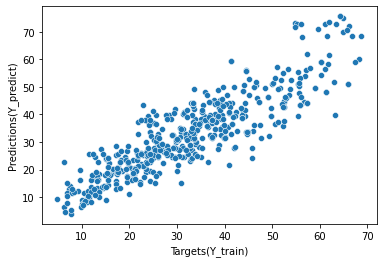

In [74]:
sns.scatterplot(Y_train,Y_pred_LS)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


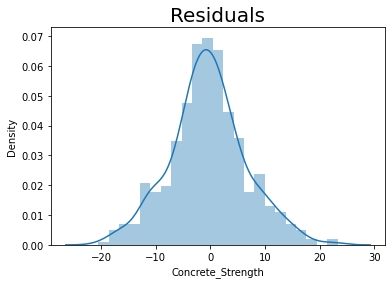

In [75]:
sns.distplot(Y_train - Y_pred_LS)
plt.title('Residuals', size=20)
plt.show()

### Testing

In [76]:
Y_pred_LSt=LS.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


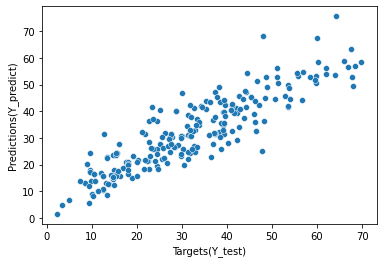

In [77]:
sns.scatterplot(Y_test,Y_pred_LSt)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


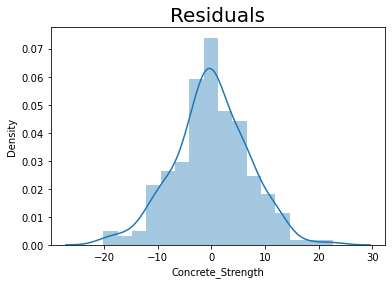

In [78]:
sns.distplot(Y_test - Y_pred_LSt)
plt.title('Residuals', size=20)
plt.show()

In [79]:
mse=mean_squared_error(Y_test,Y_pred_LSt)
print("mse:", mse)
rmse=np.sqrt(mse)
print("rmse:", rmse)  
print ("R2 Score :" , r2_score(Y_test,Y_pred_LSt))
print ("training set score :",LS.score(X_train, Y_train))
print ("test set score :", LS.score(X_test,Y_test))

mse: 47.74307915326617
rmse: 6.909636687501462
R2 Score : 0.8010686861571545
training set score : 0.7718157242933615
test set score : 0.8010686861571545


Here test score is greater than training score so thers is underfitting of data so we use Kfold cross validation.


### Kfold cross Validation

In [80]:
cval_LS=cross_validate(LS,X,Y,cv=5)

In [81]:
cval_LS["test_score"]

array([0.73977266, 0.52902102, 0.74924447, 0.8024268 , 0.61469023])

In [82]:
cval_LS["test_score"].mean()

0.6870310345307087

### Ridge Regression

In [83]:
from sklearn.linear_model import Ridge 

In [84]:
RD=Ridge(alpha=.01)

In [85]:
RD.fit(X_train,Y_train)

Ridge(alpha=0.01)

In [86]:
Y_pred_RD=RD.predict(X_train)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


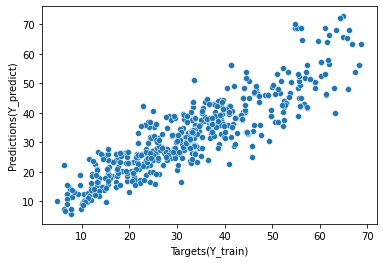

In [87]:
sns.scatterplot(Y_train,Y_pred_RD)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


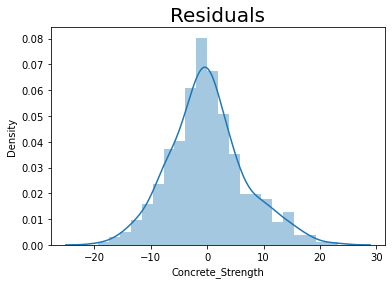

In [88]:
sns.distplot(Y_train - Y_pred_RD)
plt.title('Residuals', size=20)
plt.show()

In [89]:
Y_pred_RDt=RD.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


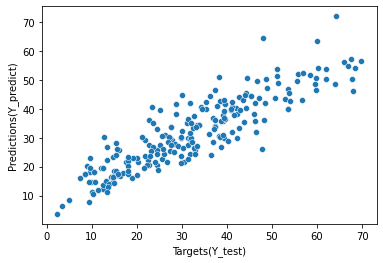

In [90]:
sns.scatterplot(Y_test,Y_pred_RDt)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


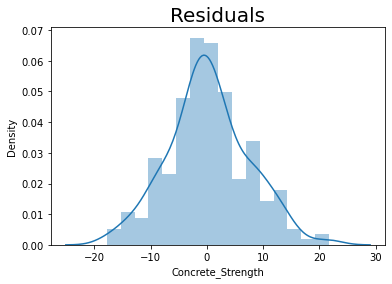

In [91]:
sns.distplot(Y_test - Y_pred_RDt)
plt.title('Residuals', size=20)
plt.show()

In [92]:
print("mse:", mean_squared_error(Y_test,Y_pred_RDt))
rmse=np.sqrt(mse)
print("rmse:", rmse)  
print ("R2 Score :" , r2_score(Y_test,Y_pred_RDt))
print ("training set score :",RD.score(X_train, Y_train))
print ("test set score :", RD.score(X_test,Y_test))

mse: 51.591619935678175
rmse: 6.909636687501462
R2 Score : 0.7850329530666001
training set score : 0.78864493154276
test set score : 0.7850329530666001


From the training and testinfg score we can find that there is underfitting of data so we use cross validation

After ridge regression we got accuracy for train as 78.8 and test as 80.1

### KFold crossvalidation

In [93]:
cval_RD=cross_validate(RD,X,Y,cv=5)

In [94]:
cval_RD["test_score"]

array([0.7396709 , 0.52899558, 0.74904522, 0.80243265, 0.61456751])

In [95]:
cval_RD["test_score"].mean()

0.6869423710811335

### Desicion Tree


### Training

In [96]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [98]:
TreeReg = DecisionTreeRegressor(max_depth=4)

In [99]:
TreeReg_fit = TreeReg.fit(X_train,Y_train)


In [100]:
y_pred_DT=TreeReg_fit.predict(X_train)


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


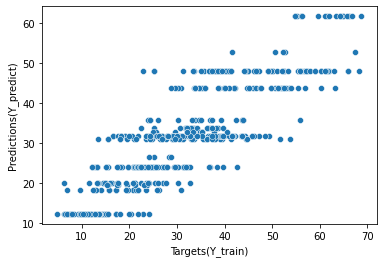

In [101]:
sns.scatterplot(Y_train,y_pred_DT)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


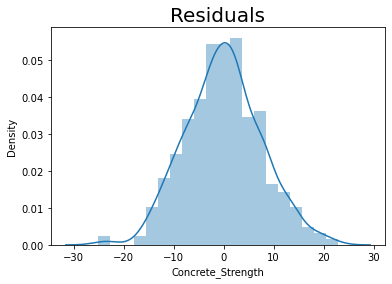

In [102]:
sns.distplot(Y_train-y_pred_DT)
plt.title('Residuals', size=20)
plt.show()

In [103]:
y_pred_DTt = TreeReg_fit.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


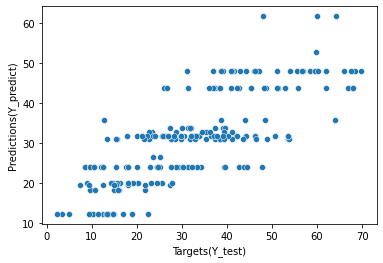

In [104]:
sns.scatterplot(Y_test,y_pred_DTt)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


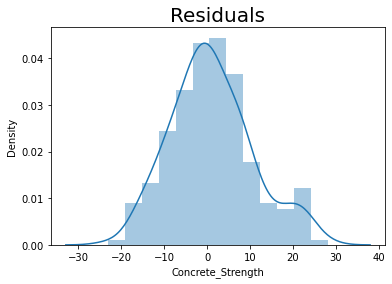

In [105]:
sns.distplot(Y_test-y_pred_DTt)
plt.title('Residuals', size=20)
plt.show()

In [106]:
print("mse:", mean_squared_error(Y_test,y_pred_DTt))
rmse=np.sqrt(mse)
print("rmse:", rmse)  
print ("R2 Score :" , r2_score(Y_test,y_pred_DTt))
print ("training set score :",RD.score(X_train, Y_train))
print ("test set score :", RD.score(X_test,Y_test))

mse: 93.44639883277785
rmse: 6.909636687501462
R2 Score : 0.610636447766371
training set score : 0.78864493154276
test set score : 0.7850329530666001


we got training and testing score equal 78.8

In [107]:
from sklearn import tree

[Text(697.5, 978.48, 'X[0] <= 0.32\nmse = 214.334\nsamples = 529\nvalue = 32.172'),
 Text(348.75, 761.0400000000001, 'X[7] <= -0.775\nmse = 144.499\nsamples = 335\nvalue = 27.004'),
 Text(174.375, 543.6, 'X[3] <= -0.794\nmse = 38.509\nsamples = 94\nvalue = 15.193'),
 Text(87.1875, 326.1600000000001, 'X[0] <= -0.013\nmse = 36.829\nsamples = 14\nvalue = 22.045'),
 Text(43.59375, 108.72000000000003, 'mse = 10.922\nsamples = 11\nvalue = 19.617'),
 Text(130.78125, 108.72000000000003, 'mse = 30.936\nsamples = 3\nvalue = 30.948'),
 Text(261.5625, 326.1600000000001, 'X[6] <= -0.3\nmse = 29.148\nsamples = 80\nvalue = 13.994'),
 Text(217.96875, 108.72000000000003, 'mse = 31.189\nsamples = 22\nvalue = 18.432'),
 Text(305.15625, 108.72000000000003, 'mse = 18.068\nsamples = 58\nvalue = 12.31'),
 Text(523.125, 543.6, 'X[3] <= -0.333\nmse = 110.206\nsamples = 241\nvalue = 31.611'),
 Text(435.9375, 326.1600000000001, 'X[0] <= -0.752\nmse = 127.633\nsamples = 78\nvalue = 38.024'),
 Text(392.34375, 108.

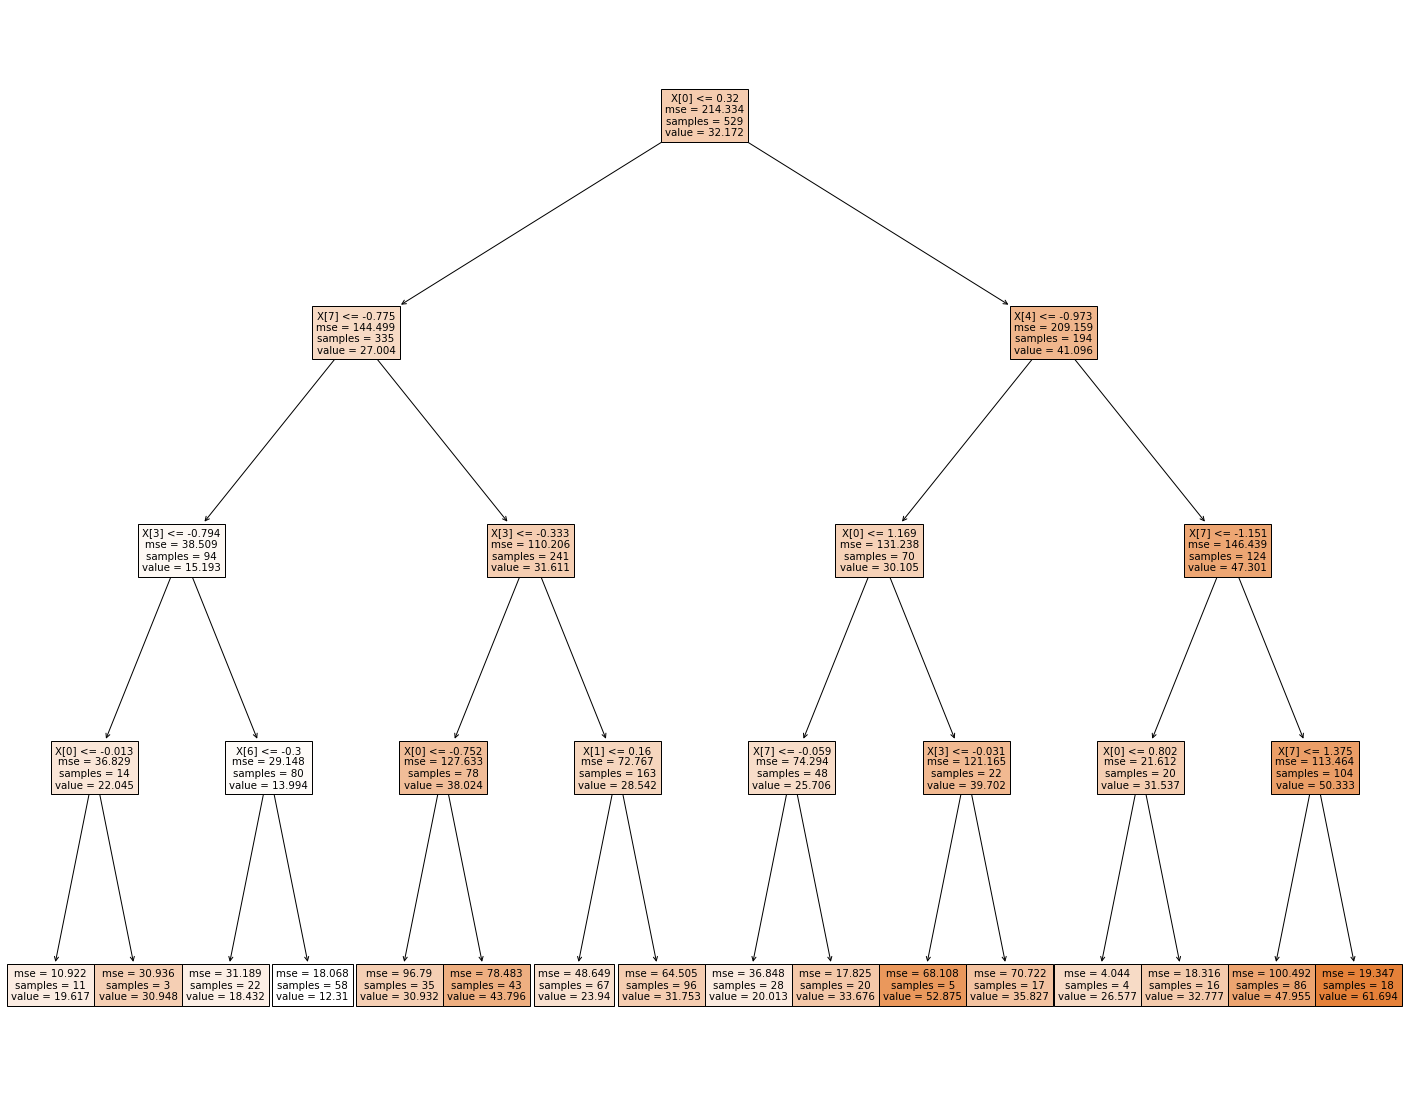

In [108]:
plt.figure(figsize = (25,20))
tree.plot_tree(TreeReg,filled = True)

### Hyper Parameter Tunning for Decision Tree

In [109]:
from sklearn.model_selection import GridSearchCV

In [173]:
params_tree = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100]
    
}
grid_search_tree = GridSearchCV(estimator=TreeReg_fit,
                         param_grid=params_tree,
                         cv=4, n_jobs=-1, verbose=1)
grid_search_tree_fit = grid_search_tree.fit(X_train, Y_train)


Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


In [174]:
print('best_score_ :',grid_search_tree_fit.best_score_)
print('best_params_ :',grid_search_tree_fit.best_params_)
print('best_estimator_ :',grid_search_tree_fit.best_estimator_)

best_score_ : 0.7084139771327502
best_params_ : {'max_depth': 10, 'min_samples_leaf': 5}
best_estimator_ : DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)


After hyper parameter tuning we have the best accuracy of .70 and max_depth=20 and min sample leaf =5

### K fold method for Decision Tree

In [175]:
from sklearn.model_selection import KFold, cross_validate


In [176]:
cval_DT=cross_validate(TreeReg,X,Y,cv=8)

In [177]:
cval_DT["test_score"]

array([0.57286712, 0.33370145, 0.39094656, 0.59089937, 0.53212501,
       0.55687525, 0.30930708, 0.35854353])

In [178]:
cval_DT["test_score"].mean()

0.4556581723493146

The average accuracy of k fold is 45.5



### Random Forest Regressor 

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [117]:
rf=RandomForestRegressor(n_estimators=100,max_features=0.2,random_state=0)

In [118]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_features=0.2, random_state=0)

In [119]:
Y_predrf=rf.predict(X_train)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


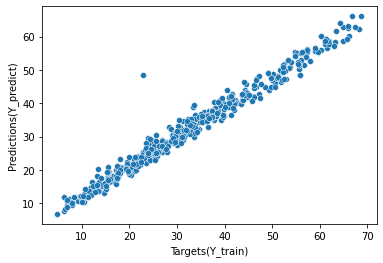

In [120]:
sns.scatterplot(Y_train,Y_predrf)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


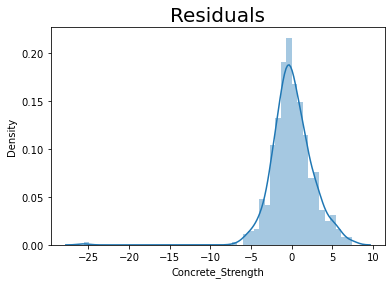

In [121]:
sns.distplot(Y_train - Y_predrf)
plt.title('Residuals', size=20)
plt.show()

In [122]:
Y_test_predrf=rf.predict(X_test)

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


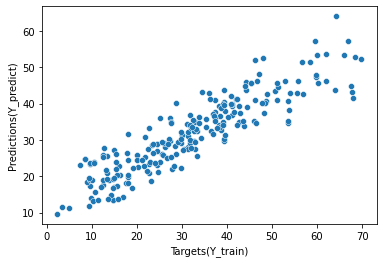

In [123]:
sns.scatterplot(Y_test,Y_test_predrf)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


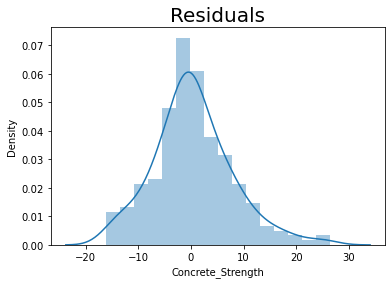

In [124]:
sns.distplot(Y_test - Y_test_predrf)
plt.title('Residuals', size=20)
plt.show()

In [125]:
print("mse:", mean_squared_error(Y_test,Y_test_predrf))
rmse=np.sqrt(mse)
print("rmse:", rmse)
print ("R2 Score :" , r2_score(Y_test,Y_test_predrf))
print ("training set score :",rf.score(X_train, Y_train))
print ("test set score :", rf.score(X_test,Y_test))

mse: 56.94170539571131
rmse: 6.909636687501462
R2 Score : 0.7627407266620305
training set score : 0.9688776110018107
test set score : 0.7627407266620305


Thr training score is greater than testing score there is overfitting of data  so we use cross validateand k fold method to regularize model


### Hyper Parameter Tunning for RandomForest

In [126]:
pram_grid_random = {'n_estimators' : [20,50,80,100],
                        'max_features':[1,2,3,4]}

In [127]:
grid_results_random = GridSearchCV(rf, pram_grid_random, cv = 5)
grid_results_random_fit = grid_results_random.fit(X_train, Y_train)
grid_results_random_fit

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=0.2, random_state=0),
             param_grid={'max_features': [1, 2, 3, 4],
                         'n_estimators': [20, 50, 80, 100]})

In [128]:
print('best_score_ :',grid_results_random_fit.best_score_)
print('best_params_ :',grid_results_random_fit.best_params_)
print('best_estimator_ :',grid_results_random_fit.best_estimator_)

best_score_ : 0.8508557062188664
best_params_ : {'max_features': 4, 'n_estimators': 100}
best_estimator_ : RandomForestRegressor(max_features=4, random_state=0)


### Kfold for RandomFrorestRegressor 

In [129]:
cval_RF=cross_validate(rf,X,Y,cv=5)


In [130]:
cval_RF["test_score"]

array([0.70394612, 0.43720232, 0.73669184, 0.84716241, 0.45586822])

In [131]:
cval_RF["test_score"].mean()

0.6361741784345079

### KNN Regressor

In [132]:
from sklearn.neighbors import KNeighborsRegressor 

In [133]:
KNeighbor=KNeighborsRegressor(n_neighbors=5)
KNeighbor.fit(X_train,Y_train)

KNeighborsRegressor()

In [134]:
KNY_pred_train=KNeighbor.predict(X_train)

In [135]:
KNY_pred_test=KNeighbor.predict(X_test)

In [136]:
print("mse:", mean_squared_error(Y_test,KNY_pred_test)) 
rmse = np.sqrt(mse)
print ("R2 Score :" , r2_score(Y_test,KNY_pred_test))
print ("RMSE :", rmse)
print ("training set score :", KNeighbor.score(X_train, Y_train))
print ("test set score :", KNeighbor.score(X_test,Y_test))


mse: 58.69003426699553
R2 Score : 0.7554559564804207
RMSE : 6.909636687501462
training set score : 0.8527312799559006
test set score : 0.7554559564804207


Training set score is higher that the test set score sothere is overfitting of data 

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


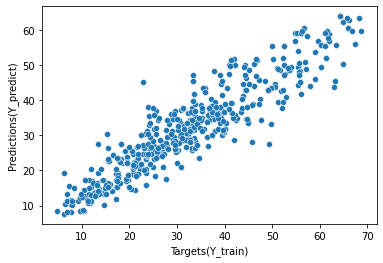

In [137]:
sns.scatterplot(Y_train,KNY_pred_train)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


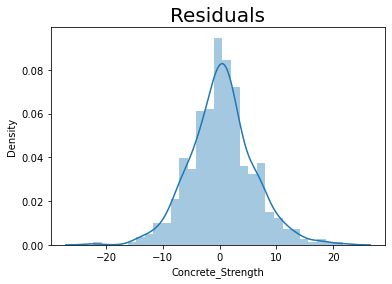

In [138]:
sns.distplot(Y_train - KNY_pred_train)
plt.title('Residuals', size=20)
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


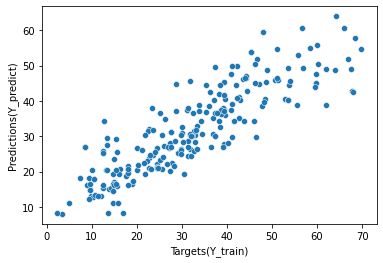

In [139]:
sns.scatterplot(Y_test,KNY_pred_test)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


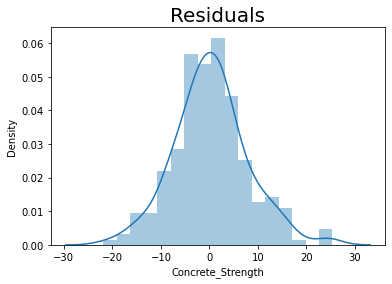

In [140]:
sns.distplot(Y_test - KNY_pred_test)
plt.title('Residuals', size=20)
plt.show()

### Hyper Parameter tunning for KNN Regressor

In [141]:
pram_grid_KNN ={'n_neighbors':[3,20,2],
                 'metric':['canberra','euclidean','minkowski']}             

In [142]:
grid_search_knn=GridSearchCV(KNeighbor,pram_grid_KNN,cv=5)
grid_search_knn_fit=grid_search_knn.fit(X_train,Y_train)
grid_search_knn_fit

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [3, 20, 2]})

In [143]:
print('best_score_ :',grid_search_knn.best_score_)
print('best_params_ :',grid_search_knn.best_params_)
print('best_estimator_ :',grid_search_knn.best_estimator_)

best_score_ : 0.7423858300748136
best_params_ : {'metric': 'euclidean', 'n_neighbors': 3}
best_estimator_ : KNeighborsRegressor(metric='euclidean', n_neighbors=3)


### K fold cross validation

In [179]:
knn=KNeighborsRegressor(n_neighbors=5)
cval_knn=cross_validate(knn,X,Y,cv=8)

In [180]:
cval_knn["test_score"]

array([0.42336996, 0.03719011, 0.00693875, 0.38083399, 0.09102267,
       0.38773137, 0.78541894, 0.76374805])

In [181]:
cval_knn["test_score"].mean()

0.3595317279015181

### SVM Regressor

In [151]:
from sklearn.svm import SVR

In [152]:
svm_reg=SVR(C=80,kernel="rbf")

In [153]:
svm_reg.fit(X_train,Y_train)

SVR(C=80)

In [154]:
Y_pred_SVR=svm_reg.predict(X_test)

In [155]:
Y_pred_SVRt=svm_reg.predict(X_train)

In [156]:
print("mse:", mean_squared_error(Y_test, Y_pred_SVR))
rmse = np.sqrt(mse)
print ("R2 Score :" , r2_score(Y_test,Y_pred_SVR))
print ("RMSE :", rmse)
print ("training set score :", svm_reg.score(X_train, Y_train))
print ("test set score :", svm_reg.score(X_test,Y_test))


mse: 30.805193098841443
R2 Score : 0.8716438561354112
RMSE : 6.909636687501462
training set score : 0.9442024208487636
test set score : 0.8716438561354112


Training score is greater thn testing score so there is overfitting of data 


C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


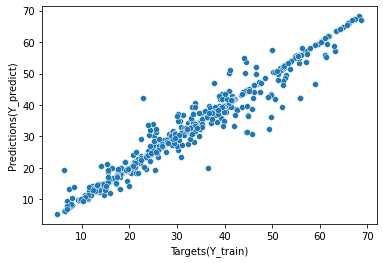

In [157]:
sns.scatterplot(Y_train,Y_pred_SVRt)
plt.xlabel('Targets(Y_train)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


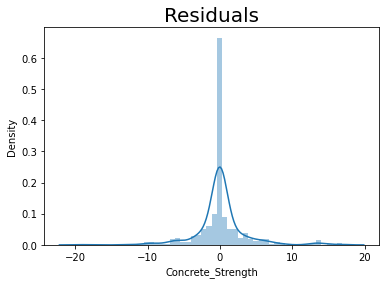

In [158]:
sns.distplot(Y_train - Y_pred_SVRt)
plt.title('Residuals', size=20)
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


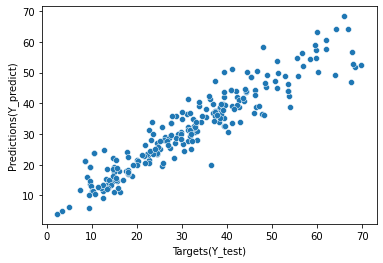

In [159]:
sns.scatterplot(Y_test,Y_pred_SVR)
plt.xlabel('Targets(Y_test)')
plt.ylabel('Predictions(Y_predict)')
plt.show()

C:\Users\Sarath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


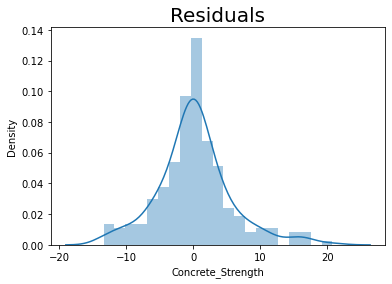

In [160]:
sns.distplot(Y_test - Y_pred_SVR)
plt.title('Residuals', size=20)
plt.show()

### Hyper Parameter Tuning for SVM Regressor 

In [161]:
param_grid_SVR={ "gamma": [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

In [162]:
grid_search_SVR=GridSearchCV(svm_reg,param_grid_SVR,cv=5)
grid_search_SVR_fit=grid_search_SVR.fit(X_train,Y_train)
grid_search_SVR_fit

GridSearchCV(cv=5, estimator=SVR(C=80),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001]})

In [163]:
print('best_score_ :',grid_search_SVR_fit.best_score_)
print('best_params_ :',grid_search_SVR_fit.best_params_)
print('best_estimator_ :',grid_search_SVR_fit.best_estimator_) 

best_score_ : 0.8337770966050619
best_params_ : {'C': 1000, 'gamma': 0.01}
best_estimator_ : SVR(C=1000, gamma=0.01)


### Kfold cross validation


In [164]:
cval_SVR=cross_validate(svm_reg,X,Y,cv=5)

In [165]:
cval_SVR["test_score"]

array([0.75562693, 0.47147532, 0.66697309, 0.75945566, 0.61853272])

In [166]:
cval_SVR["test_score"].mean()

0.654412743691507